# Week 10

----


- Neural networks


In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(name="mnist_784")

/home/molesz/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
mnist.keys()
data = mnist.data
labels = mnist.target

In [8]:
data.shape

(70000, 784)

In [9]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import matplotlib.pyplot as plt
def viz(test_img, test_label, size=(28,28)):
    plt.imshow(test_img.reshape(size[0], size[1]),cmap="Greys")
    plt.axis("off")
    plt.title(str(test_label))
    plt.show()


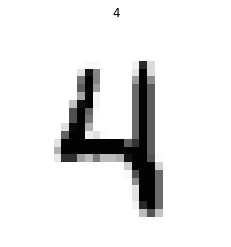

In [82]:
import numpy as np

choice = np.random.choice(np.arange(data.shape[0] + 1))

test_img = data.iloc[choice].values

test_label = mnist.target.iloc[choice]

viz(test_img, test_label)

### Normalization

----

In [87]:


def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))



In [88]:
n_data = normalize(data.values)
n_data.shape

(70000, 784)

#### One hot encoding 

In [92]:
def one_hot_encode(x:np.ndarray, num_labels: int)-> np.ndarray:
    return np.eye(num_labels)[x]

#### Tanuló és teszt adatok

In [89]:
train_test_split_no = int(n_data.shape[0]*0.8)
train_test_split_no

56000

In [94]:
X_train = n_data[:train_test_split_no]
y_train = labels[:train_test_split_no].values.astype(int)
y_train = one_hot_encode(y_train,10)
X_train.shape, y_train

((56000, 784),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [95]:
X_test = n_data[train_test_split_no:]
y_test = labels[train_test_split_no:].values.astype(int)
y_test = one_hot_encode(y_test, 10)

X_test.shape


(14000, 784)

In [97]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input((X_train.shape[1])),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

2023-04-27 11:18:38.270953: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-27 11:18:38.323136: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 11:18:38.533192: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 11:18:38.534159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 11:18:39.371539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2023-04-27 11:18:40.075200: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [98]:
for layer in model.get_weights():
    print(layer.shape)


(784, 128)
(128,)
(128, 10)
(10,)


In [107]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [103]:
x = tf.ones((3,X_train.shape[1]))
model(x)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.00815979, 0.20197178, 0.04962934, 0.02215865, 0.00481899,
        0.1730797 , 0.19011532, 0.04621216, 0.19918431, 0.10466991],
       [0.00815979, 0.20197178, 0.04962934, 0.02215865, 0.00481899,
        0.1730797 , 0.19011532, 0.04621216, 0.19918431, 0.10466991],
       [0.00815979, 0.20197178, 0.04962934, 0.02215865, 0.00481899,
        0.1730797 , 0.19011532, 0.04621216, 0.19918431, 0.10466991]],
      dtype=float32)>

#### Tanulás
----

In [111]:
model.fit(X_train, y_train, epochs=5, batch_size=10000000)

Epoch 1/5
1/1 [==============================] - 0s 223ms/step - loss: 0.0119 - accuracy: 0.9983
Epoch 2/5
1/1 [==============================] - 0s 98ms/step - loss: 0.0118 - accuracy: 0.9984
Epoch 3/5
1/1 [==============================] - 0s 91ms/step - loss: 0.0118 - accuracy: 0.9984
Epoch 4/5
1/1 [==============================] - 0s 93ms/step - loss: 0.0119 - accuracy: 0.9985
Epoch 5/5
1/1 [==============================] - 0s 87ms/step - loss: 0.0120 - accuracy: 0.9986


In [112]:
model.evaluate(X_test, y_test)

438/438 [==============================] - 0s 588us/step - loss: 0.0665 - accuracy: 0.9807


[0.06645242124795914, 0.9807142615318298]

In [121]:
choice = np.random.choice(np.arange(X_test.shape[0] + 1))
test_input = X_test[choice]
test_label = y_test[choice]

1/1 [==============================] - 0s 10ms/step
6


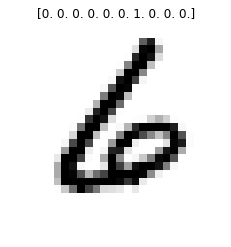

In [122]:

print(np.argmax(model.predict(np.array([test_input]))))
viz(test_input, test_label)